In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Term5 - Train/loans.csv')

In [ ]:
# df.head()
df.describe()
# df.columns
# df.index
# df.value_counts()
# df.dtypes
# df.shape

In [ ]:
fig = px.box (df, y = 'rate')
fig.show ()

In [ ]:
df = df [(df ['rate'] < 10) & (df ['rate'] > 1)]

In [ ]:
df['loan_start'] = pd.to_datetime (df['loan_start'])
df['loan_end'] = pd.to_datetime (df['loan_end'])

<ipython-input-13-68ca6259321e>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['loan_start'] = pd.to_datetime (df['loan_start'])
<ipython-input-13-68ca6259321e>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['loan_end'] = pd.to_datetime (df['loan_end'])


In [ ]:
print (df.dtypes)

In [ ]:
df.head()

In [ ]:
df.isnull ().sum()

In [ ]:
label_encoder_obj = LabelEncoder ()
df['loan_type'] = label_encoder_obj.fit_transform (df['loan_type'])
df['loan_start'] = label_encoder_obj.fit_transform (df['loan_start'])
df['loan_end'] = label_encoder_obj.fit_transform (df['loan_end'])

In [ ]:
# 'loan_type', 'loan_amount', 'repaid'

# scaler_obj = MinMaxScaler ()
# columns = df.columns
# df[['loan_type', 'loan_amount', 'repaid']] = scaler_obj.fit_transform (df[['loan_type', 'loan_amount', 'repaid']])

# df = pd.DataFrame (df)
# df.columns = columns
# df

Index(['client_id', 'loan_type', 'loan_amount', 'repaid', 'loan_id',
       'loan_start', 'loan_end', 'rate'],
      dtype='object')

In [ ]:
scaler_obj = MinMaxScaler ()
columns = df.columns
df = scaler_obj.fit_transform (df)
df = pd.DataFrame (df)
df.columns = columns

In [ ]:
X_columns = ['rate']
X = df [X_columns]
y = df ['loan_amount']
X = np.c_ [np.ones ((X.shape[0], 1)), X]
X = pd.DataFrame (X)
X_columns.insert (0, 'bios')
X.columns = X_columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(241,)

***Linear Regression - Single Variable***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
model = LinearRegression ()
model.fit (X_train, y_train)
print(f"model intercept : {model.intercept_}")
print(f"model conf : {model.coef_}")
y_pred = model.predict (X_train)
r2 = r2_score(y_train, y_pred)
print (f"R2 is : {r2}")

model intercept : 0.5619146054916742
model conf : [ 0.        -0.1195161]
R2 is : 0.009774823764022722


In [ ]:
y_new_pred = model.predict (X_test)
r2 = r2_score(y_test, y_new_pred)
print (f"R2 is : {r2}")

R2 is : -0.015947434707714647


In [ ]:
print(f"X and y : \n{X_test['rate'].to_numpy()} ==> {y_new_pred}")

In [ ]:
print("Predictions for new data:")
for i in range(len(X_train.to_numpy())):
    print(f"{X_train.to_numpy()[i]} ========> {y_pred[i]}")

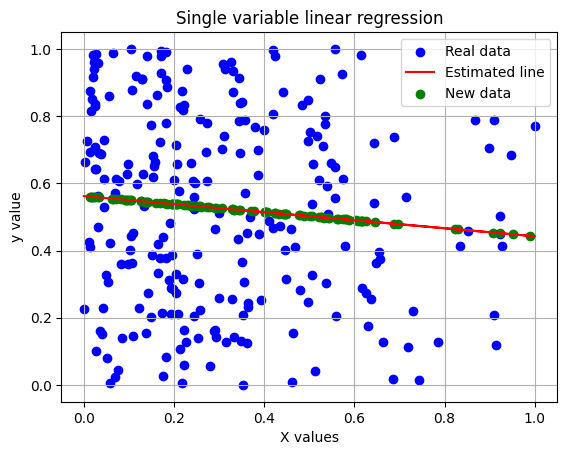

In [ ]:
# Plot real data
plt.scatter(X_train['rate'], y_train_numpy, color='blue')

# Estimated line drawing
plt.plot(X_train['rate'], y_pred, color='red')

# Plot new data
plt.scatter(X_test['rate'], y_new_pred, color='green')

# Add labels to plot
plt.xlabel('X values')
plt.ylabel('y value')
plt.title('Single variable linear regression')
plt.legend(['Real data','Estimated line',  'New data'])
plt.grid(True)

# Show plot
plt.show()

***Linear Regression - MultiVariable***

In [ ]:
X_columns = ['loan_type', 'repaid', 'rate']
X = df [X_columns]
y = df ['loan_amount']
X = np.c_ [np.ones ((X.shape[0], 1)), X]
X = pd.DataFrame (X)
X_columns.insert (0, 'bios')
X.columns = X_columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression ()
model.fit (X_train, y_train)
print(f"model intercept : {model.intercept_}")
print(f"model conf : {model.coef_}")
y_pred = model.predict (X_train)
mse = mean_squared_error (y_train, y_pred)
r2 = r2_score (y_train, y_pred)
print(f"Mean Squared Error : {mse}")
print(f"R-squared : {r2}")

model intercept : 0.5724938472673209
model conf : [ 0.         -0.00365035 -0.01914889 -0.11620592]
Mean Squared Error : 0.08002278655210254
R-squared : 0.010921785159893727


In [ ]:
y_new_pred = model.predict (X_test)
r2 = r2_score(y_test, y_new_pred)
print (f"R2 is : {r2}")

R2 is : -0.02940757287648821


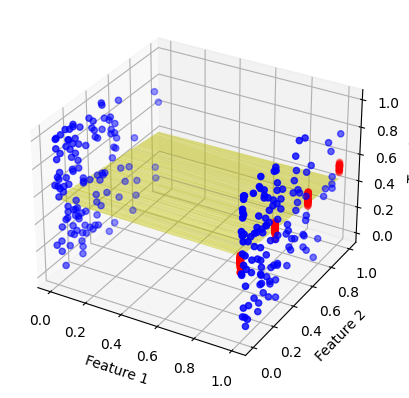

In [ ]:
y_train_numpy = y_train.to_numpy()
# Draw a regression plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot real data
ax.scatter(X_train.iloc [:,2], X_train.iloc [:, 3], y_train_numpy, color='blue')

# # Estimated area drawing
ax.plot_trisurf(X_train.iloc [:,2].to_numpy().flatten(), X_train.iloc [:, 3].to_numpy().flatten(), y_pred.flatten(), color='#ff0', alpha=0.5)

# Plot new data
ax.scatter(X_test.iloc [:,0], X_test.iloc [:,1], y_new_pred, color='red')

# Add labels to plot
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

# Show plot
plt.show()

**Polynomial Regression **

In [ ]:
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



<Axes: xlabel='repaid', ylabel='loan_amount'>

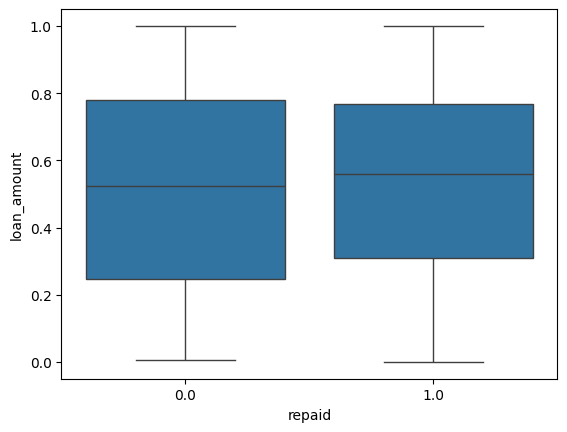

In [ ]:
sns.boxplot(x="repaid", y="loan_amount", data=df)

<Axes: xlabel='rate', ylabel='loan_amount'>

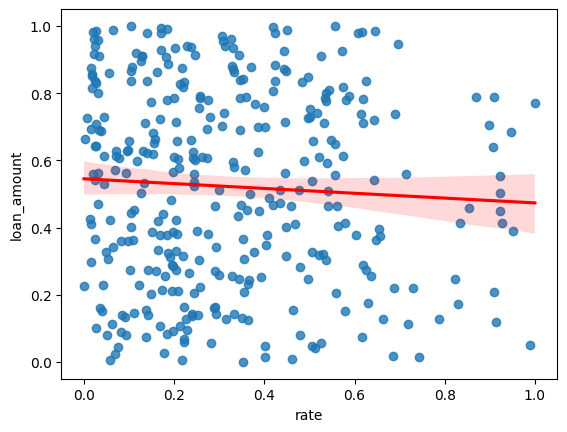

In [ ]:
sns.regplot(x="rate", y="loan_amount", data=df, line_kws={"color": "red"})

In [ ]:
sns.regplot(x="loan_type", y="loan_amount", data=df, line_kws={"color": "red"})

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), cbar=False, square= True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Reds')

In [ ]:
features =['loan_type', 'repaid', 'rate']
X = df[features]
y = df['loan_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
pf = PolynomialFeatures()
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)
model.fit(X_train_poly, y_train)
y_pred = model.predict (X_train_poly)
model.score(X_test_poly, y_test)